# Preprocessing the Dataset


In [24]:
%autocall 2
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplleaflet

Automatic calling is: Full


## Importing the Dataset (Excel)

Let's import the Excel file:

In [6]:
df = pd.read_excel('./Todos_v5.xlsx')

,Record Name,NOME antigo,AUTORIA,DATA,NÍVEL DE DETALHE,ESPECIFICAÇÃO DO DETALHE,PAÍS,ESTADO,MUNICÍPIO,BAIRRO,...,DESIGNAÇÃO GENÉRICA,ALTURA,LARGURA,CATEGORIES,TÍTULO,COPYRIGHT,STATUS,COLEÇÃO,Unnamed: 20,CROMIA
0,001AAN004002.jpg,NaN,Anônimo,1890,década,NaT,Brasil,SP,São Paulo,NaN,...,FOTOGRAFIA/ Papel,"17,0","23,0",COLEÇÕES DO ACERVO:001 - MESTRES DO SÉCULO XIX,Rua Direita - Viaduto do Chá - O casarão dos B...,Instituto Moreira Salles,Requer liberação de direitos junto ao detentor...,Coleção Mestres do Séc. XIX,NaN,P&B
1,001AAN004005.jpg,NaN,Anônimo,1900,década,NaT,Brasil,SP,São Paulo,NaN,...,FOTOGRAFIA/ Papel,"16,7","22,8",COLEÇÕES DO ACERVO:001 - MESTRES DO SÉCULO XIX,Mercadinho da avenida São João,Instituto Moreira Salles,Requer liberação de direitos junto ao detentor...,Coleção Mestres do Séc. XIX,NaN,P&B
2,001AAN004006.jpg,NaN,Anônimo,1900,década,NaT,Brasil,SP,São Paulo,NaN,...,FOTOGRAFIA/ Papel,"17,2","22,7",COLEÇÕES DO ACERVO:001 - MESTRES DO SÉCULO XIX,Praça da Sé,Instituto Moreira Salles,Requer liberação de direitos junto ao detentor...,Coleção Mestres do Séc. XIX,NaN,P&B
3,001AAN004010.jpg,NaN,Anônimo,1890,década,NaT,Brasil,SP,São Paulo,NaN,...,FOTOGRAFIA/ Papel,"17,0","22,8",COLEÇÕES DO ACERVO:001 - MESTRES DO SÉCULO XIX,Panorama do Gasômetro e Brás,Instituto Moreira Salles,Requer liberação de direitos junto ao detentor...,Coleção Mestres do Séc. XIX,NaN,P&B
4,001AAN004012.jpg,NaN,Anônimo,1893,circa,NaT,Brasil,SP,São Paulo,NaN,...,FOTOGRAFIA/ Papel,"16,4","22,4",COLEÇÕES DO ACERVO:001 - MESTRES DO SÉCULO XIX,Escola Politécnica,Instituto Moreira Salles,Requer liberação de direitos junto ao detentor...,Coleção Mestres do Séc. XIX,NaN,P&B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,028RJ-005,NaN,"Medeiros, José",1960,ano,NaT,Brasil,RJ,Rio de Janeiro,Centro,...,NEGATIVO flexível,"6,0","6,0",PALAVRAS-CHAVE:ASPECTOS FORMAIS DA IMAGEM:Temp...,Avenida Beira Mar,Instituto Moreira Salles,NaN,NaN,NaN,P&B
1219,028RJ-006,NaN,"Medeiros, José",1949,circa,NaT,Brasil,RJ,Rio de Janeiro,Maracanã,...,NEGATIVO flexível,"6,0","6,0",PALAVRAS-CHAVE:ASPECTOS FORMAIS DA IMAGEM:Temp...,Construção do Maracanã,Instituto Moreira Salles,NaN,NaN,NaN,P&B
1220,028RJ-007,NaN,"Medeiros, José",1949,circa,NaT,Brasil,RJ,Rio de Janeiro,Maracanã,...,NEGATIVO flexível,"6,0","6,0",PALAVRAS-CHAVE:ASPECTOS FORMAIS DA IMAGEM:Temp...,Construção do Maracanã,Instituto Moreira Salles,NaN,NaN,NaN,P&B
1221,028RJ-010,NaN,"Medeiros, José",1950,década,NaT,Brasil,RJ,Rio de Janeiro,Urca,...,NEGATIVO flexível,"6,0","6,0",PALAVRAS-CHAVE:ASPECTOS FORMAIS DA IMAGEM:Temp...,Praia Vermelha,Instituto Moreira Salles,NaN,NaN,NaN,P&B


Let us see the table's columns:

In [7]:
df.columns

Index(['Record Name', 'NOME antigo', 'AUTORIA', 'DATA', 'NÍVEL DE DETALHE',
       'ESPECIFICAÇÃO DO DETALHE', 'PAÍS', 'ESTADO', 'MUNICÍPIO', 'BAIRRO',
       'LOCAL', 'PROCESSO FORMADOR DA IMAGEM', 'DESIGNAÇÃO GENÉRICA', 'ALTURA',
       'LARGURA', 'CATEGORIES', 'TÍTULO', 'COPYRIGHT', 'STATUS ', 'COLEÇÃO',
       'Unnamed: 20', 'CROMIA'],
      dtype='object')

An specifically the "CATEGORIES" column:

In [13]:
random.sample(list(df.CATEGORIES), 100)

['COLEÇÕES DO ACERVO:001 - MESTRES DO SÉCULO XIX',
 'COLEÇÕES DO ACERVO:028 - JOSÉ MEDEIROS',
 'COLEÇÕES DO ACERVO:024 - MAUREEN BISILLIAT:Individualizadas:Índios',
 'PALAVRAS-CHAVE:ASPECTOS FORMAIS DA IMAGEM:Temporalidade:Diurna',
 'PALAVRAS-CHAVE:ASPECTOS FORMAIS DA IMAGEM:Temporalidade:Diurna',
 'COLEÇÕES DO ACERVO:014 - PEDRO CORRÊA do LAGO',
 'PALAVRAS-CHAVE:ASPECTOS FORMAIS DA IMAGEM:Temporalidade:Diurna',
 'PALAVRAS-CHAVE:ASSUNTOS:Indumentária',
 'COLEÇÕES DO ACERVO:007 - GILBERTO FERREZ :Fichários',
 'COLEÇÕES DO ACERVO:007 - GILBERTO FERREZ :Fichários:A5P3F04',
 'PALAVRAS-CHAVE:ASSUNTOS:Indumentária',
 'PALAVRAS-CHAVE:LOCALIDADES:Bairros:Bairro de Botafogo',
 'PALAVRAS-CHAVE:ASPECTOS FORMAIS DA IMAGEM:Formato da Imagem:Vertical',
 'COLEÇÕES DO ACERVO:001 - MESTRES DO SÉCULO XIX:Álbuns:Alb.024-SP à Cachoeira do Marimbondo',
 'COLEÇÕES DO ACERVO:P004 - Thomaz Farkas:Série Ilimitada',
 'COLEÇÕES DO ACERVO:001 - MESTRES DO SÉCULO XIX:Álbuns:Alb.024-SP à Cachoeira do Marimbondo',
 

## Loading the Dataset (Mine)

In [2]:
df = pd.read_pickle('output.pickle')

,file name,title,author,time of image,place,image process,image dimensions,annotations,country,state,...,timing,image format,ambient,genre,day,month,year,location string,latitude,longitude
0,028-candomble002.jpg,Ritual de candomblé de iniciação das filhas-de...,"Medeiros, José",1951,None,GELATINA/ Prata,i: 6 x 6 cm,PALAVRAS-CHAVE:ASSUNTOS:Manifestações / Festas...,Brasil,BA,...,NaN,NaN,NaN,NaN,0.0,0.0,1951.0,"Salvador, BA, Brasil",-12.982250,-38.481277
1,028013.jpg,Moça na praia de Copacabana,"Medeiros, José",1949,Copacabana,GELATINA/ Prata,i: 6 x 6 cm,PALAVRAS-CHAVE:ASSUNTOS:Lazer / Entretenimento...,Brasil,RJ,...,Diurna,NaN,Externa,Retrato,0.0,0.0,1949.0,"Copacabana, Rio de Janeiro, RJ, Brasil",-22.971964,-43.184343
2,028016.jpg,Baile de carnaval na Boate Casablanca,"Medeiros, José",1946,Urca,GELATINA/ Prata,i: 6 x 6 cm,PALAVRAS-CHAVE:ASSUNTOS:Lazer / Entretenimento...,Brasil,RJ,...,NaN,NaN,Interna,Retrato,0.0,0.0,1946.0,"Urca, Rio de Janeiro, RJ, Brasil",-22.954074,-43.167973
3,028017.jpg,Teatro João Caetano,"Medeiros, José",1950,Praça Tiradentes,GELATINA/ Prata,i: 6 x 6 cm,PALAVRAS-CHAVE:ASSUNTOS:Lazer / Entretenimento...,Brasil,RJ,...,Noturna,NaN,Externa,NaN,0.0,0.0,1950.0,"Praça Tiradentes, Rio de Janeiro, RJ, Brasil",-22.907049,-43.182977
4,028023.jpg,Déa Gomes Cardim no Jockey Club,"Medeiros, José",1945,Gávea,GELATINA/ Prata,i: 6 x 6 cm,PALAVRAS-CHAVE:ASSUNTOS:Lazer / Entretenimento...,Brasil,RJ,...,Diurna,NaN,Externa,Retrato,0.0,0.0,1945.0,"Gávea, Rio de Janeiro, RJ, Brasil",-22.981424,-43.238324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,028RJ-003.jpg,Largo do Machado,"Medeiros, José",1950,Largo do Machado,GELATINA/ Prata,i: 6 x 6 cm,PALAVRAS-CHAVE:ASPECTOS FORMAIS DA IMAGEM:Espa...,Brasil,RJ,...,Diurna,NaN,Externa,Cena de rua,0.0,0.0,1950.0,"Largo do Machado, Rio de Janeiro, RJ, Brasil",-22.930851,-43.178140
197,028RJ-005.jpg,Avenida Beira Mar,"Medeiros, José",1960,Centro,GELATINA/ Prata,i: 6 x 6 cm,PALAVRAS-CHAVE:ASPECTOS FORMAIS DA IMAGEM:Espa...,Brasil,RJ,...,Diurna,NaN,Externa,Paisagem,0.0,0.0,1960.0,"Centro, Rio de Janeiro, RJ, Brasil",-22.904393,-43.183065
198,028RJ-006.jpg,Construção do Maracanã,"Medeiros, José",1949,Maracanã,GELATINA/ Prata,i: 6 x 6 cm,PALAVRAS-CHAVE:ASSUNTOS:Esportes:Futebol;PALAV...,Brasil,RJ,...,Diurna,NaN,Externa,NaN,0.0,0.0,1949.0,"Maracanã, Rio de Janeiro, RJ, Brasil",-22.912092,-43.231145
199,028RJ-007.jpg,Construção do Maracanã,"Medeiros, José",1949,Maracanã,GELATINA/ Prata,i: 6 x 6 cm,PALAVRAS-CHAVE:ASSUNTOS:Esportes:Futebol;PALAV...,Brasil,RJ,...,Diurna,NaN,Externa,NaN,0.0,0.0,1949.0,"Maracanã, Rio de Janeiro, RJ, Brasil",-22.912092,-43.231145


In [31]:
df['image dimensions']

0      i: 6 x 6 cm
1      i: 6 x 6 cm
2      i: 6 x 6 cm
3      i: 6 x 6 cm
4      i: 6 x 6 cm
          ...     
197    i: 6 x 6 cm
198    i: 6 x 6 cm
199    i: 6 x 6 cm
200    i: 6 x 6 cm
201    i: 6 x 6 cm
Name: image dimensions, Length: 202, dtype: object

In [32]:
random.choice(df['image dimensions'])

'i: 6 x 6 cm'

In [33]:
df['image class']

0      [[PALAVRAS-CHAVE, ASSUNTOS, Manifestações / Fe...
1      [[PALAVRAS-CHAVE, ASSUNTOS, Lazer / Entretenim...
2      [[PALAVRAS-CHAVE, ASSUNTOS, Lazer / Entretenim...
3      [[PALAVRAS-CHAVE, ASSUNTOS, Lazer / Entretenim...
4      [[PALAVRAS-CHAVE, ASSUNTOS, Lazer / Entretenim...
                             ...                        
197    [[PALAVRAS-CHAVE, ASPECTOS FORMAIS DA IMAGEM, ...
198    [[PALAVRAS-CHAVE, ASSUNTOS, Esportes, Futebol]...
199    [[PALAVRAS-CHAVE, ASSUNTOS, Esportes, Futebol]...
200    [[PALAVRAS-CHAVE, ASSUNTOS, Lazer / Entretenim...
201          [[COLEÇÕES DO ACERVO, 028 - JOSÉ MEDEIROS]]
Name: image class, Length: 202, dtype: object

In [27]:
random.choice(df['image class'])

[['PALAVRAS-CHAVE', 'ASSUNTOS', 'Lazer / Entretenimento'],
 ['PALAVRAS-CHAVE',
  'ASSUNTOS',
  'Manifestações / Festas Populares',
  'Carnaval'],
 ['PALAVRAS-CHAVE', 'ASPECTOS FORMAIS DA IMAGEM', 'Espacialidade', 'Interna'],
 ['PALAVRAS-CHAVE',
  'LOCALIDADES',
  'Teatro',
  'Teatro Municipal do Rio de Janeiro'],
 ['PALAVRAS-CHAVE',
  'ASPECTOS FORMAIS DA IMAGEM',
  'Gênero da Imagem',
  'Retrato'],
 ['PALAVRAS-CHAVE', 'ASSUNTOS', 'Manifestações / Festas Populares'],
 ['COLEÇÕES DO ACERVO', '028 - JOSÉ MEDEIROS']]

In [28]:
df['formal aspects']

0                                                     []
1      [[PALAVRAS-CHAVE, ASPECTOS FORMAIS DA IMAGEM, ...
2      [[PALAVRAS-CHAVE, ASPECTOS FORMAIS DA IMAGEM, ...
3      [[PALAVRAS-CHAVE, ASPECTOS FORMAIS DA IMAGEM, ...
4      [[PALAVRAS-CHAVE, ASPECTOS FORMAIS DA IMAGEM, ...
                             ...                        
197    [[PALAVRAS-CHAVE, ASPECTOS FORMAIS DA IMAGEM, ...
198    [[PALAVRAS-CHAVE, ASPECTOS FORMAIS DA IMAGEM, ...
199    [[PALAVRAS-CHAVE, ASPECTOS FORMAIS DA IMAGEM, ...
200    [[PALAVRAS-CHAVE, ASPECTOS FORMAIS DA IMAGEM, ...
201                                                   []
Name: formal aspects, Length: 202, dtype: object

In [43]:
random.choice(df['formal aspects'])

[['PALAVRAS-CHAVE',
  'ASPECTOS FORMAIS DA IMAGEM',
  'Gênero da Imagem',
  'Retrato'],
 ['PALAVRAS-CHAVE', 'ASPECTOS FORMAIS DA IMAGEM', 'Espacialidade', 'Interna']]

In [41]:
df['timing'].dropna()

1       Diurna
3      Noturna
4       Diurna
5       Diurna
6       Diurna
        ...   
196     Diurna
197     Diurna
198     Diurna
199     Diurna
200     Diurna
Name: timing, Length: 93, dtype: object

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(df['longitude'].dropna(), df['latitude'].dropna(), s=50, c='r')
mplleaflet.display(tiles='cartodb_positron')

/home/daniel/.local/lib/python3.6/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [4]:
df.columns

Index(['file name', 'title', 'author', 'time of image', 'place',
       'image process', 'image dimensions', 'annotations', 'country', 'state',
       'county', 'time precision', 'formal aspects', 'timing', 'image format',
       'ambient', 'genre', 'day', 'month', 'year', 'location string',
       'latitude', 'longitude'],
      dtype='object')

In [14]:
datetime.date(2019, 12, 20).strftime("%d/%m/%Y")

'20/12/2019'

In [23]:
dates = []
for _, row in df.iterrows():
    if row['year'] == 0:
        continue
    elif row['month'] == 0:
        date = datetime.date(int(row['year']), 1, 1)
    elif row['day'] == 0:
        date = datetime.date(int(row['year']), int(row['month']), 1)
    else:
        date = datetime.date(int(row['year']), int(row['month']), int(row['day']))
    dates.append(date)

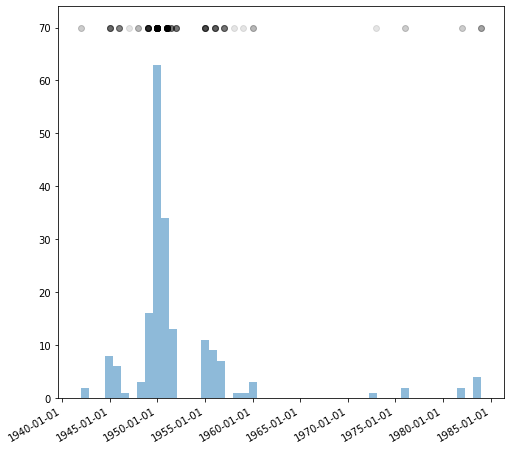

In [52]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.hist(dates, 50, alpha=0.5)
ax.scatter(dates, [70 for _ in dates], c='k', alpha=0.1)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.show()